In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from labs import *
from math import sqrt

igor = 1

In [529]:
g = Value(9.8, 0.05)
r = Value(1.75, 0.05) / 100

In [530]:
if igor:
    a = pd.read_csv("data_constant.csv")
else:
    a = pd.read_csv("help.csv")

a["m"] = a["m"].apply(const_err(0.5))
a["b0"] = a["b0"].apply(series_err(a["err"]))
del a["err"]

In [531]:
if igor:
    a["M"] = (a["m"] - 24.915 + Value(25.4, 0.1))
else:
    a["M"] = (a["m"] + Value(7.175, 0.1))
a['m'] = a["m"] / 1000
a["M"] = a["m"] * g * r

In [532]:
a

,N,m,b0,M
0,3,(0.024915±0.000500),(0.343800±0.003900),(0.004273±0.000151)
1,4,(0.024915±0.000500),(0.351900±0.002600),(0.004273±0.000151)
2,5,(0.024915±0.000500),(0.344200±0.003400),(0.004273±0.000151)
3,6,(0.024915±0.000500),(0.351600±0.002800),(0.004273±0.000151)
4,7,(0.052015±0.000500),(0.804700±0.004500),(0.008921±0.000273)
5,8,(0.052015±0.000500),(0.799100±0.005200),(0.008921±0.000273)
6,9,(0.052015±0.000500),(0.773800±0.003600),(0.008921±0.000273)
7,10,(0.069515±0.000500),(1.090000±0.020000),(0.011922±0.000356)
8,11,(0.069515±0.000500),(1.093000±0.007500),(0.011922±0.000356)
9,12,(0.069515±0.000500),(1.108000±0.008600),(0.011922±0.000356)


In [533]:
def line(x, k, b):
    return k * x + b

In [534]:
params, cov = curve_fit(line, xdata= a["M"], ydata=a["b0"], )
k = Value(params[0], sqrt(cov[0][0]))
b = Value(params[1], sqrt(cov[1][1]))

print(f"k = {k}, b = {b}")

k = (98.089546±0.233702), b = (-0.073657±0.004816)


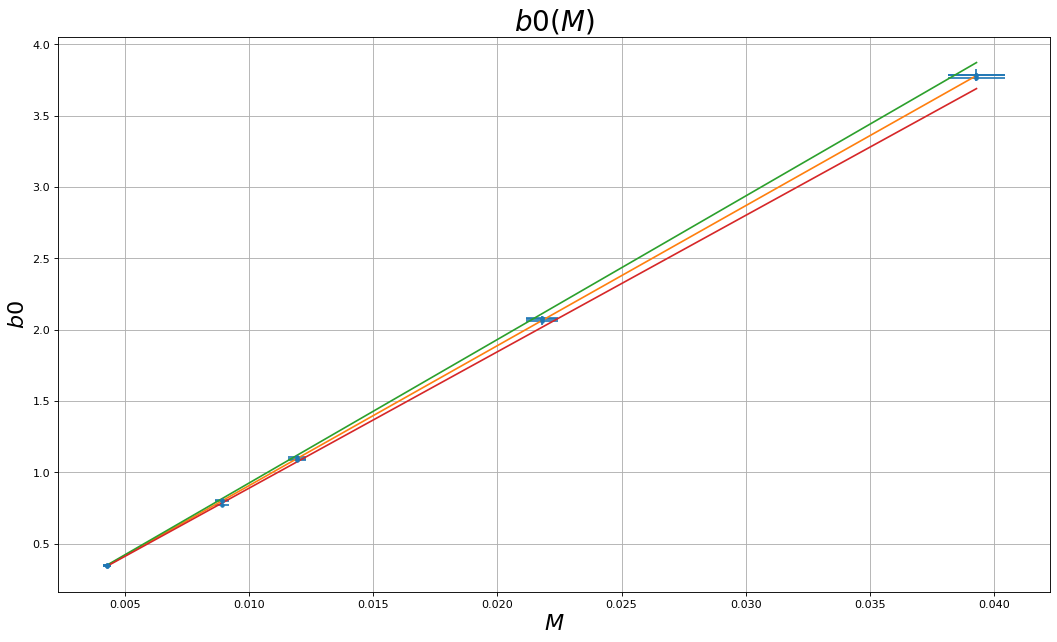

In [535]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=a["M"].apply(get_var), y=a["b0"].apply(get_var), 
             xerr=a["M"].apply(get_err), yerr=a["b0"].apply(get_err), fmt='.')
plt.title(r"$b0(M)$", fontsize=25)
plt.xlabel(r"$M$", fontsize=20)
plt.ylabel(r"$b0$", fontsize=20)
plt.grid(True)
if igor:
    delta_k = 2.5
    delta_b = 0.007
else:
    delta_k = 2
    delta_b = 0.01
plt.plot(a["M"], line(a["M"], float(k), float(b)))
plt.plot(a["M"], line(a["M"], float(k) + delta_k, float(b) - delta_b))
plt.plot(a["M"], line(a["M"], float(k) - delta_k, float(b) + delta_b))

In [536]:
real_k = Value(float(k), float(delta_k))
real_b = Value(float(b), float(delta_b))
I0 = 1 / real_k
print(I0, I0.relative_error)
print(real_b, real_b.relative_error)

(0.010195±0.000260) 0.02548691567347712
(-0.073657±0.007000) 0.09503494883132993


In [537]:
h = Value(25, 0.5) / 1000
mm = Value(149.4, 0.5)

In [538]:
if igor:
    m = pd.read_csv("data_move.csv")

m["m"] = m["m"].apply(const_err(0.5))
m["b0"] = m["b0"].apply(series_err(m["err"]))
m["R"] = m["R"].apply(const_err(0.003))
del m["err"]
m['m'] = m["m"] / 1000

In [539]:
m["R^2"] = m["R"] ** 2

In [540]:
m["M"] = (m["m"] - 24.915 + Value(25.4, 0.1))
m["M"] = m["m"] * g * r
m["I"] = m["M"] / m["b0"]

In [541]:
params, cov = curve_fit(line, xdata= m["R^2"], ydata=m["I"], )
k = Value(params[0], sqrt(cov[0][0]))
b = Value(params[1], sqrt(cov[1][1]))

print(f"k = {k}, b = {b}")

k = (0.559547±0.010762), b = (0.005786±0.000223)


In [542]:
print(b - mm * (h ** 2) / 3)

(-0.025339±0.001473)


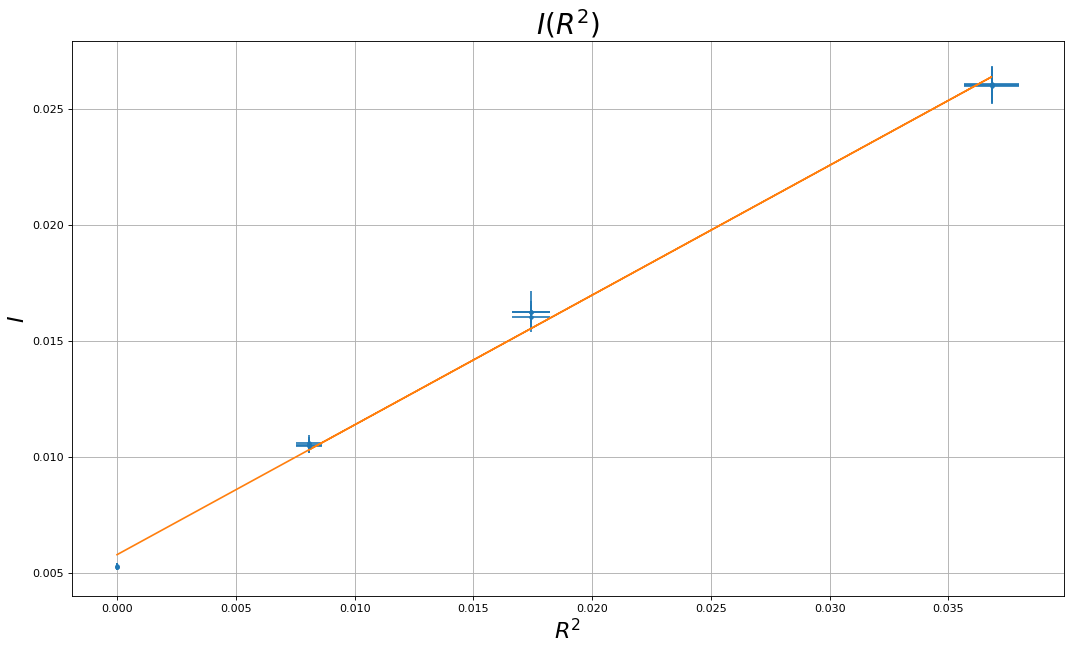

In [543]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=m["R^2"].apply(get_var), y=m["I"].apply(get_var), 
             xerr=m["R^2"].apply(get_err), yerr=m["I"].apply(get_err), fmt='.')
plt.title(r"$I(R^2)$", fontsize=25)
plt.xlabel(r"$R^2$", fontsize=20)
plt.ylabel(r"$I$", fontsize=20)
plt.grid(True)
if igor:
    delta_k = 2.5
    delta_b = 0.007
else:
    delta_k = 2
    delta_b = 0.01
plt.plot(m["R^2"], line(m["R^2"], float(k), float(b)))


In [544]:
d = pd.read_csv("test.csv")

In [545]:
d["R^2"] = d["R"] ** 2

In [546]:
params, cov = curve_fit(line, xdata= d["R^2"], ydata=d["I"], )
k = Value(params[0], sqrt(cov[0][0]))
b = Value(params[1], sqrt(cov[1][1]))

print(f"k = {k}, b = {b}")

k = (0.065469±0.003764), b = (-0.768494±0.544450)


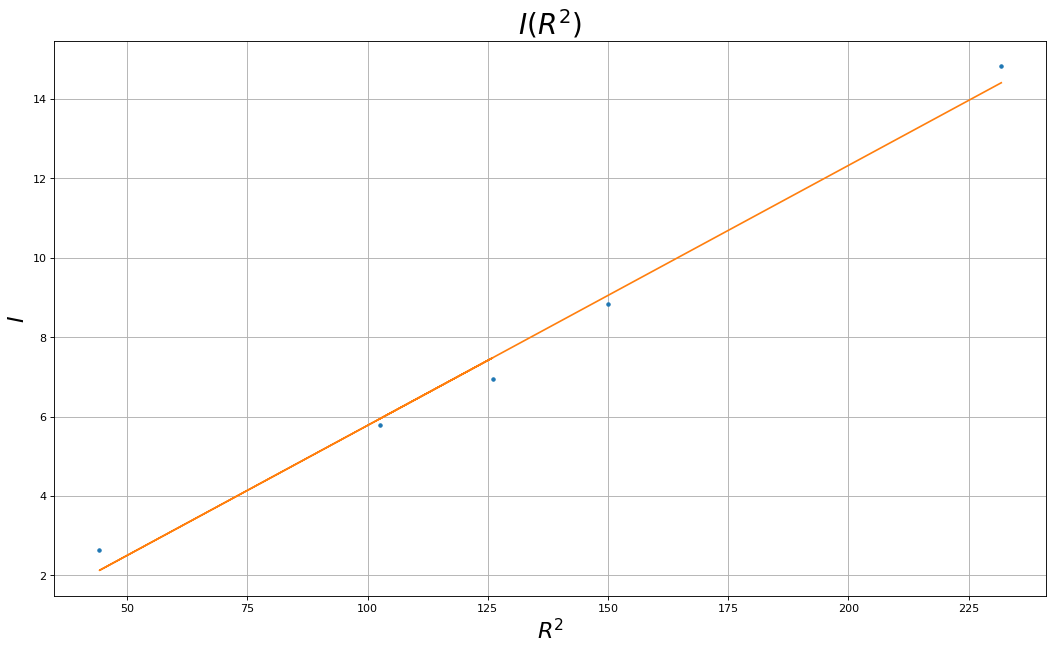

In [547]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=d["R^2"].apply(get_var), y=d["I"].apply(get_var), fmt='.')
plt.title(r"$I(R^2)$", fontsize=25)
plt.xlabel(r"$R^2$", fontsize=20)
plt.ylabel(r"$I$", fontsize=20)
plt.grid(True)
plt.plot(d["R^2"], line(d["R^2"], float(k), float(b)))